# 참고 레퍼런스
## RetinaFace
- https://github.com/biubug6/Pytorch_Retinaface
## ArcFace
- https://github.com/deepinsight/insightface/tree/master/recognition/arcface_torch

# 라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
import cv2

# 경고 메시지 무시
warnings.filterwarnings("ignore")

# 1. 데이터 가져오기

In [ ]:
MAIN_PATH = '/content/drive/MyDrive/RealTimeFaceRecognition'

In [ ]:
# image_list: Test 이미지 파일명 리스트 (100개)
data_path = os.path.join(MAIN_PATH, 'celebrity_dataset') # RealTimeFaceRecognition 폴더 아래 'celebrity_dataset' 폴더 내에 존재
image_list = [file for file in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, file))]
image_list.sort()

# 각 이미지의 전체 경로
image_path_list = list(map(lambda x: os.path.join(data_path, x),image_list))
test_dataset = image_path_list

# image_list_label
name = ['박나래', '아이유', '이영지', '제니', '차은우']
image_list_label = []
for i in name:
  for j in range(20):
    image_list_label.append(i)

# 기준 얼굴 데이터
standard_list = os.listdir(data_path+'/기준얼굴')
standard_name = []
for standard_img in standard_list:
  standard_name.append(standard_img[:-4])

# standard 이미지의 전체 경로
standard_path_list = list(map(lambda x: os.path.join(data_path+'/기준얼굴', x),standard_list))

In [ ]:
print(len(test_dataset), len(standard_list))

100 5


# 2. Face Detection (RetinaFace)

## 경로 추가하기

In [ ]:
import sys
original_path = sys.path.copy()
retina_path = MAIN_PATH
sys.path.append(f'{retina_path}/Pytorch_Retinaface')

## 방법1 라이브러리로 한번에 모델 로드하고 Retinaface 결과와 alignment 얻기

In [ ]:
from detect_faces import extract

img_path = MAIN_PATH + "/celebrity_dataset/차은우20.jpg"

trained_model = MAIN_PATH + '/Pytorch_Retinaface/weights/Resnet50_Final.pth'
network="resnet50"
align=True

faces = extract(
    trained_model = trained_model,
    img_path = img_path,
    network=network,
    align=align)

cuda
Loading pretrained model from /content/drive/MyDrive/RealTimeFaceRecognition/Pytorch_Retinaface/weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
net forward time: 2.8392
misc time: 0.0353


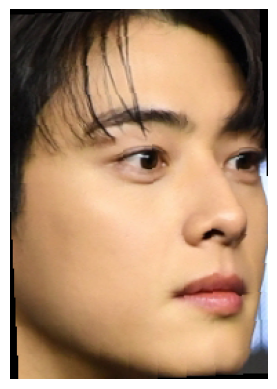

In [ ]:
# 시각화
for face in faces:
    plt.imshow(face)
    plt.axis('off')
    plt.show()

## 방법2 모델 미리 로드하고 RetinaFace 거쳐 alignment까지 얻기


In [ ]:
from detect_faces import Face_Dectector, save_img, crop_alignment
from models.retinaface import RetinaFace

trained_model = MAIN_PATH + '/Pytorch_Retinaface/weights/Resnet50_Final.pth'
img_path = MAIN_PATH + "/celebrity_dataset/제니13.jpg"
network="resnet50"
align=True

detector = Face_Dectector(
    trained_model=trained_model,
    network=network)

cuda
Loading pretrained model from /content/drive/MyDrive/RealTimeFaceRecognition/Pytorch_Retinaface/weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!


In [ ]:
import cv2
img_array = cv2.imread(img_path)

In [ ]:
dets = detector.detect(img_array)

net forward time: 1.3940
misc time: 0.0119


In [ ]:
# 이미지 위에 bounding box와 랜드마크 표시하기
detected_img = img_array.copy()
detected_img = detector.draw_info(detected_img, dets=dets)

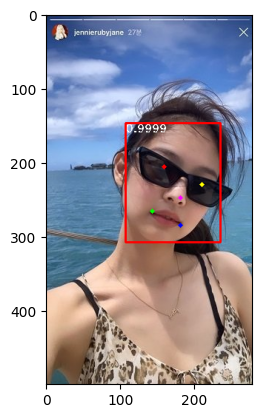

In [ ]:
# 수정된 이미지를 화면에 표시
# 시각화 1
plt.imshow(detected_img[:, :, ::-1]) # RGB 색상 변환

# 시각화 2
# cv2.imshow("image", detected_img)
# cv2.waitKey(0)

# 시각화 3
# from google.colab.patches import cv2_imshow
# cv2_imshow(detected_img)

In [ ]:
# 저장 경로에 이미지 저장하기
save_img(detected_img, "detected", save_path=MAIN_PATH)

save done


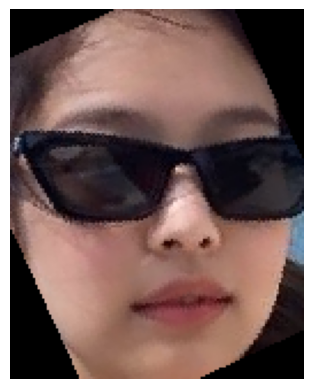

In [ ]:
# crop & alignment
faces = []
for b in dets:
    faces.append(crop_alignment(img_array, b))

# 시각화
for face in faces:
    plt.imshow(face)
    plt.axis('off')
    plt.show()

In [ ]:
save_img(face[:, :, ::-1], "cropped", save_path=MAIN_PATH)

save done
